**Problem Statement**


In [1]:
# load up modules
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from scipy import stats

#visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import tree

# metrics and models
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.isotonic import IsotonicRegression

# Figures inline and set visualization style
%matplotlib inline
sns.set()


# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/_BANKRUPTCY PREDICTION .csv')
print(df.shape)

(6819, 95)


In [4]:
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [5]:
# Get basic summary
df.info()

df.dtypes.value_counts()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

float64    93
int64       2
dtype: int64

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


In [6]:
df1_col = []
for i in range(len(df.columns)):
    df1_col.append(str(df.columns[i]).strip())  

df.columns = df1_col

In [7]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Liability-Assets Flag', 'Bankrupt']

0

<Figure size 1600x1200 with 0 Axes>

<Axes: >

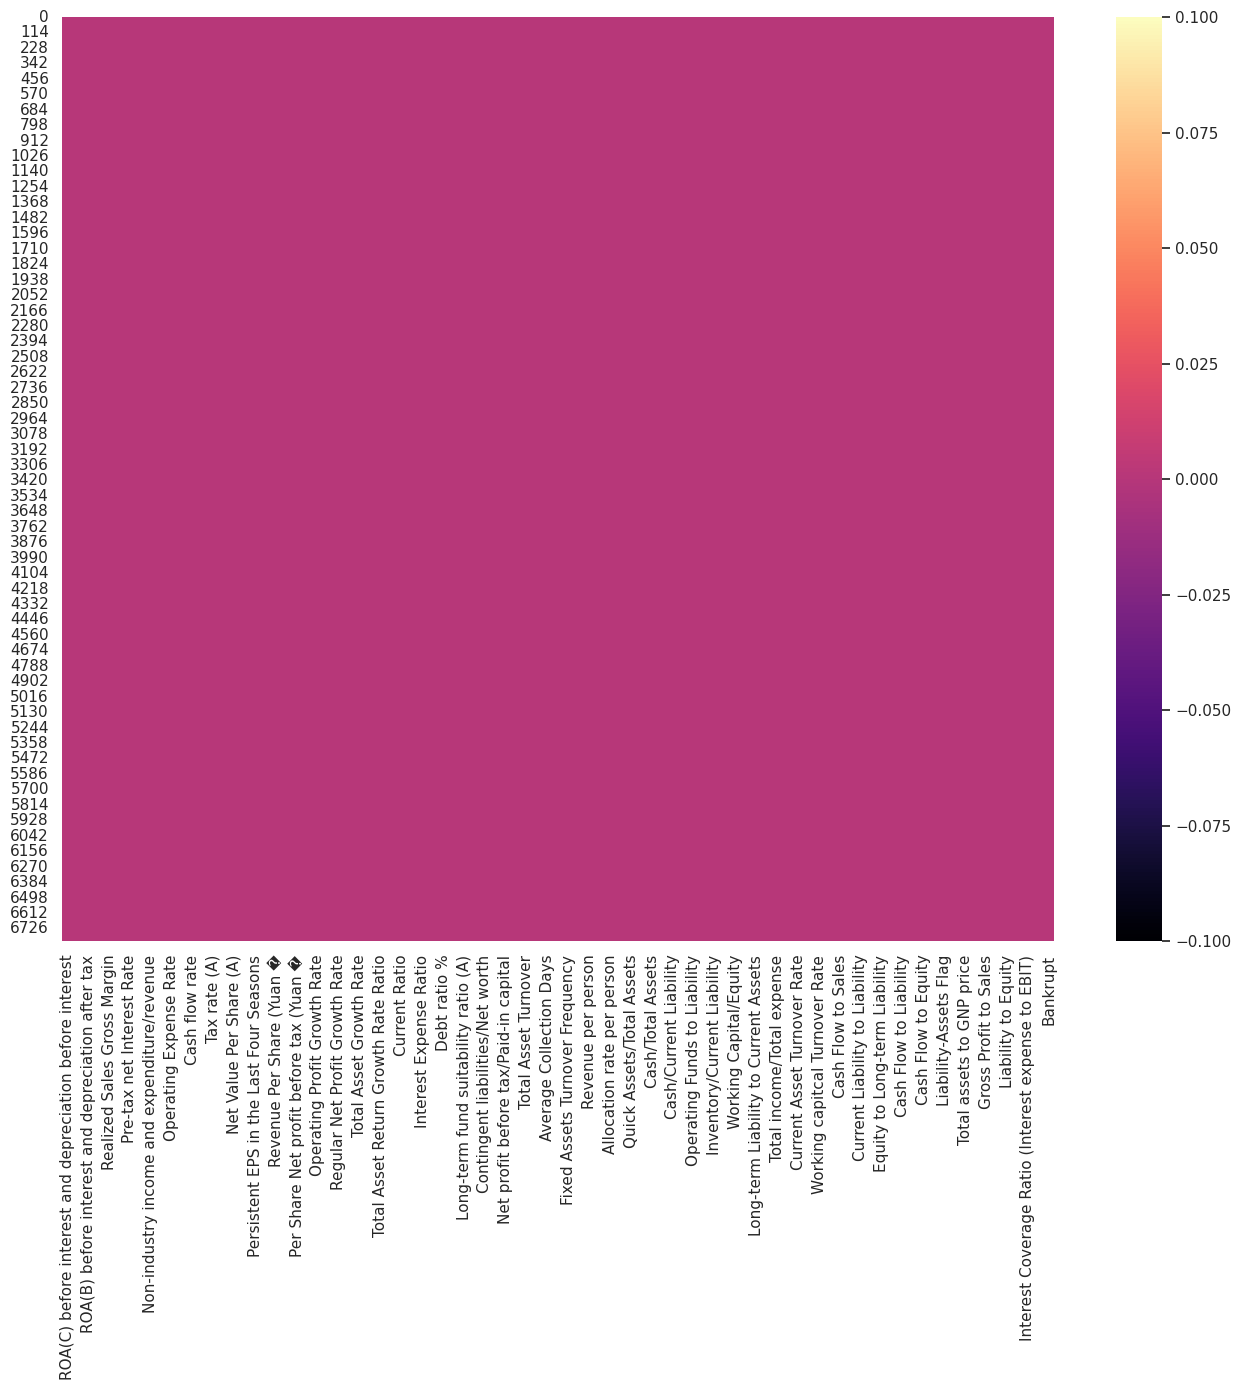

In [8]:
## No. of null values in the dataset

df.isna().sum().sum()
#Check for Missing Values
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(),cmap ='magma', square = False)

In [9]:
# check if there's missing value in the data
df.isnull().sum().sort_values(ascending=False).head()

ROA(C) before interest and depreciation before interest    0
Operating Funds to Liability                               0
Total expense/Assets                                       0
Total income/Total expense                                 0
Retained Earnings to Total Assets                          0
dtype: int64

In [10]:
#Check if there are any duplicate rows
df.duplicated(keep=False).sum()

0

In [11]:
df['Bankrupt'].describe()

b_mean = df['Bankrupt'].mean()

count    6819.000000
mean        0.032263
std         0.176710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Bankrupt, dtype: float64

In [12]:
print(f'Bankruptcy Rate = {b_mean:.4f}')

Bankruptcy Rate = 0.0323


In [13]:
# Evaluate Outliers
#Establish IQR for numeric df
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#get list of columns with total number of outliers
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False).head(50)

Degree of Financial Leverage (DFL)                    1503
Interest Coverage Ratio (Interest expense to EBIT)    1421
Fixed Assets Turnover Frequency                       1418
Current Asset Turnover Rate                           1399
Total Asset Growth Rate                               1381
Interest Expense Ratio                                1362
Cash Flow to Liability                                1212
No-credit Interval                                    1139
Non-industry income and expenditure/revenue           1095
Cash Flow to Sales                                    1052
Continuous Net Profit Growth Rate                     1042
After-tax Net Profit Growth Rate                      1033
Regular Net Profit Growth Rate                        1030
Operating Profit Growth Rate                          1008
Inventory/Working Capital                              944
Contingent liabilities/Net worth                       942
Cash Flow to Total Assets                              8

In [14]:
# It looks like we have a lot of outliers!
#Investigate Columns with more than 100 outliers

df['Degree of Financial Leverage (DFL)'].describe()

#there is a leading space in some of the column headers

count    6819.000000
mean        0.027541
std         0.015668
min         0.000000
25%         0.026791
50%         0.026808
75%         0.026913
max         1.000000
Name: Degree of Financial Leverage (DFL), dtype: float64

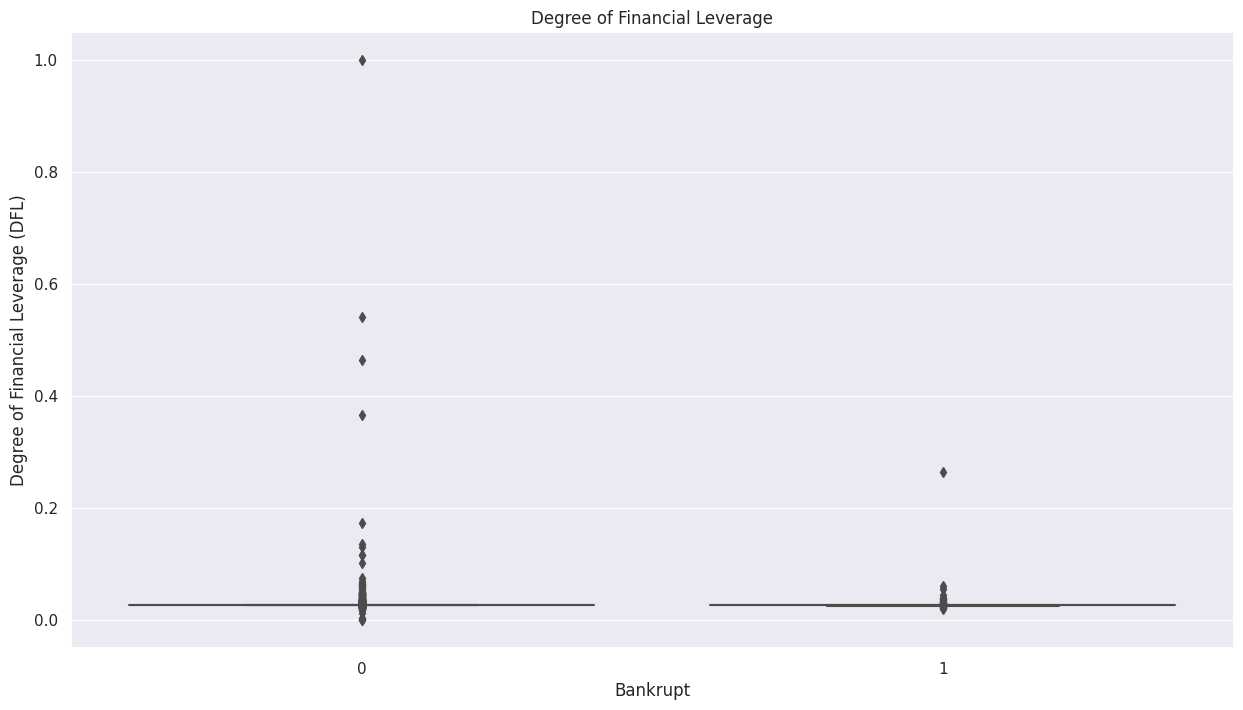

In [15]:

#Look at outliers in _Degree_of_Financial_Leverage_(DFL)

f, ax = plt.subplots(figsize = (15,8))

sns.boxplot(x = df['Bankrupt'],
y = df['Degree of Financial Leverage (DFL)'])
plt.title('Degree of Financial Leverage')
plt.show();


It looks like highly leveraged outliers did not bankrupt, we may want to drop these rows later.

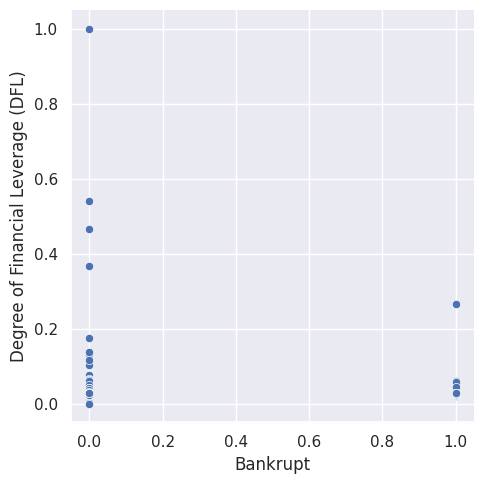

In [16]:
sns.relplot(data=df, x='Bankrupt', y='Degree of Financial Leverage (DFL)')

In [17]:
#Get Top correlations with Brankruptcy
corrmat = df.corr()
high_corrs = corrmat['Bankrupt'].sort_values(ascending=False)

corrs = high_corrs.head(20)

corrs

#Get list of names to generate plots from
corr_names = list(corrs.index)


Bankrupt                                       1.000000
Debt ratio %                                   0.250161
Current Liability to Assets                    0.194494
Borrowing dependency                           0.176543
Current Liability to Current Assets            0.171306
Liability to Equity                            0.166812
Current Liability to Equity                    0.153828
Current Liabilities/Equity                     0.153828
Liability-Assets Flag                          0.139212
Total expense/Assets                           0.139049
Equity to Long-term Liability                  0.139014
Cash/Current Liability                         0.077921
Inventory and accounts receivable/Net value    0.075278
Fixed Assets Turnover Frequency                0.072818
Contingent liabilities/Net worth               0.070455
Fixed Assets to Assets                         0.066328
Net Value Growth Rate                          0.065329
Revenue per person                             0

With a bankruptcy rate of around 3%, it makes sense that there are not many 'high' correlations

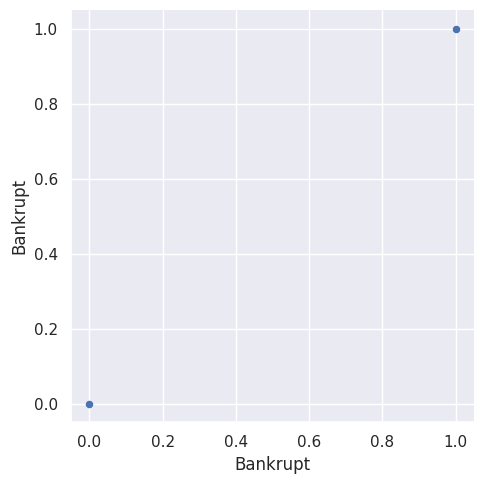

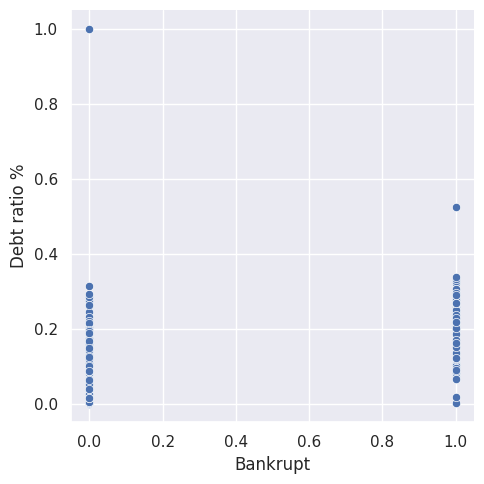

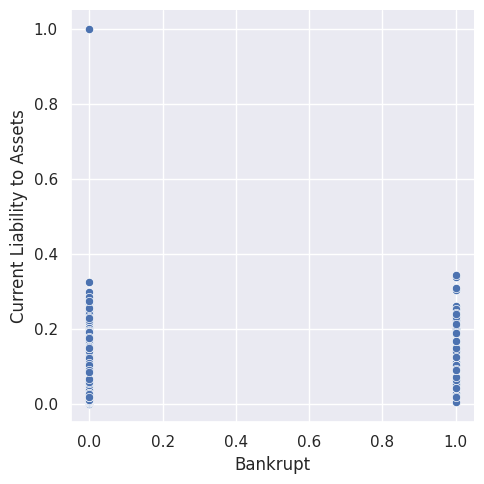

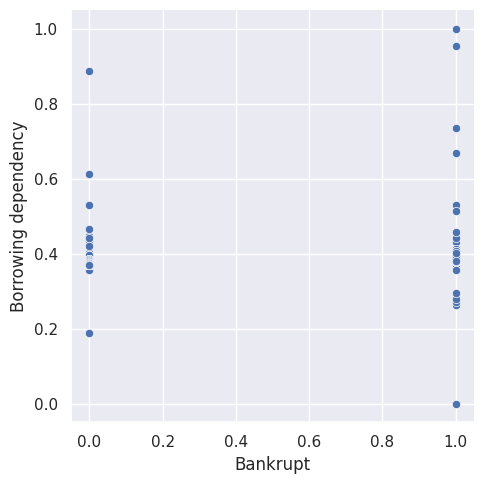

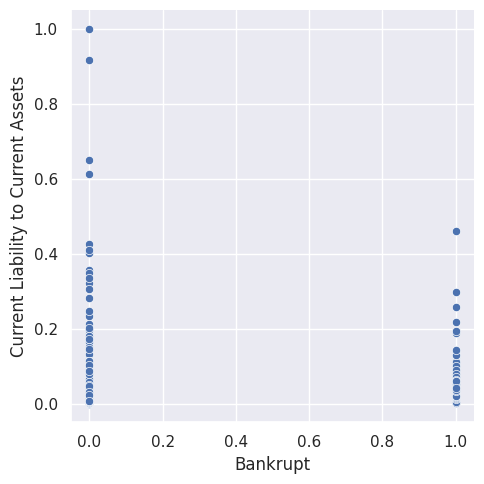

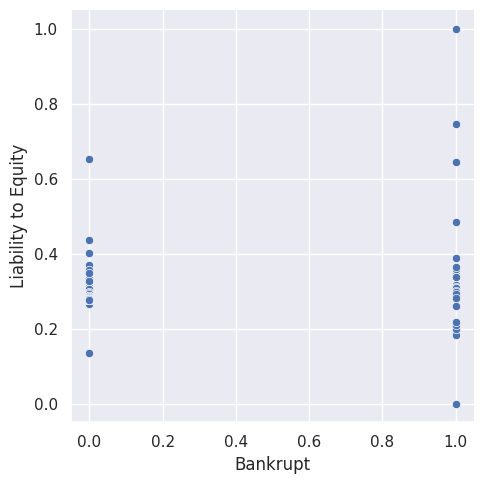

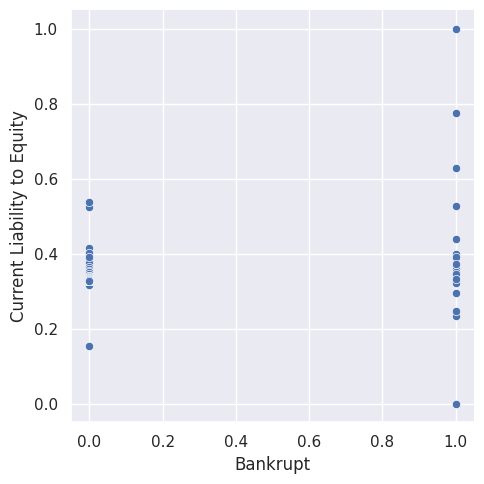

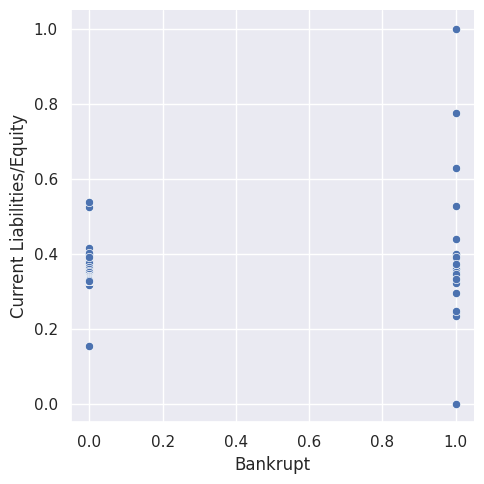

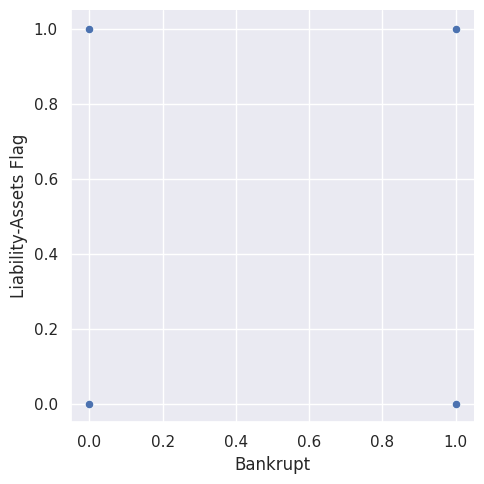

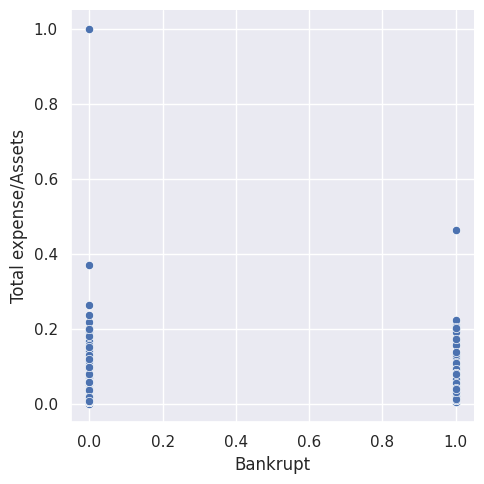

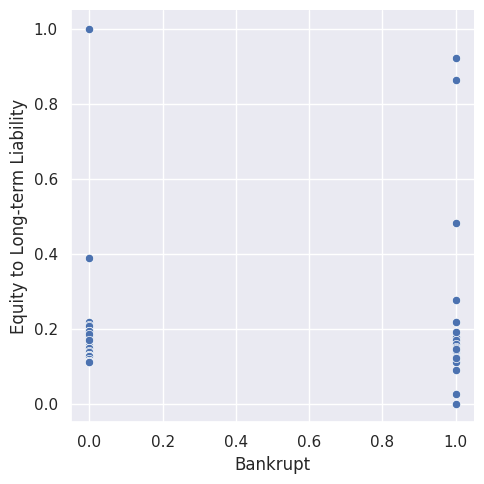

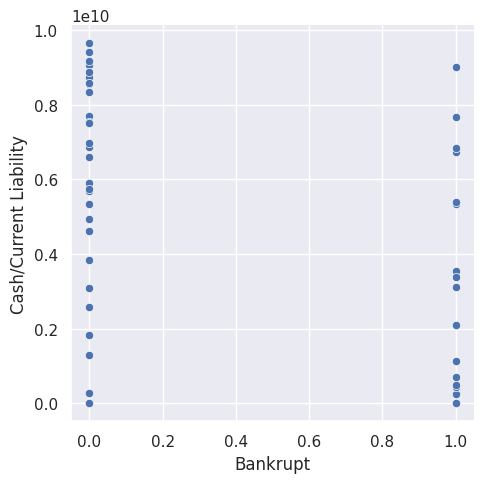

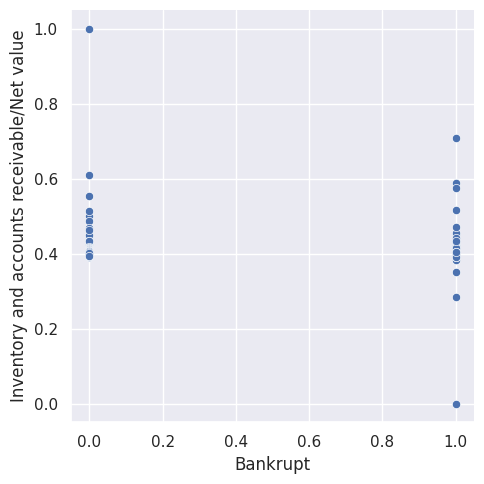

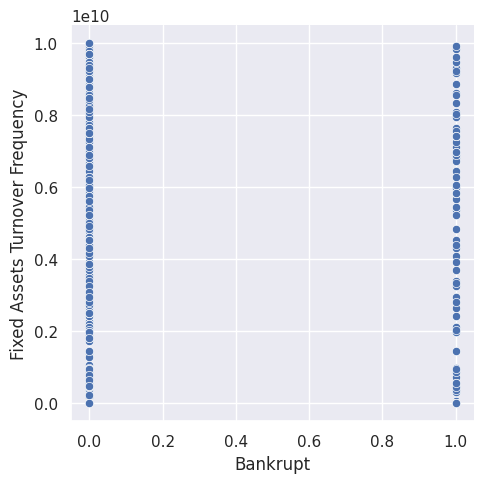

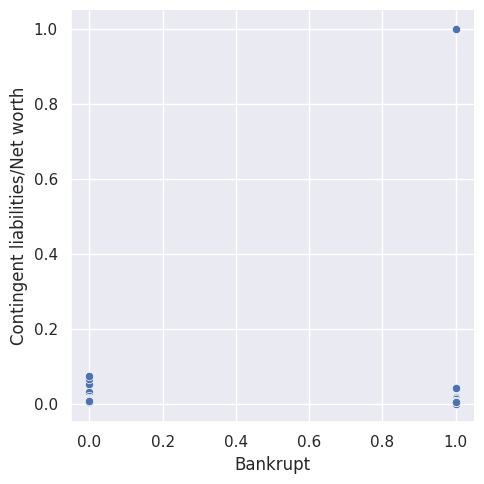

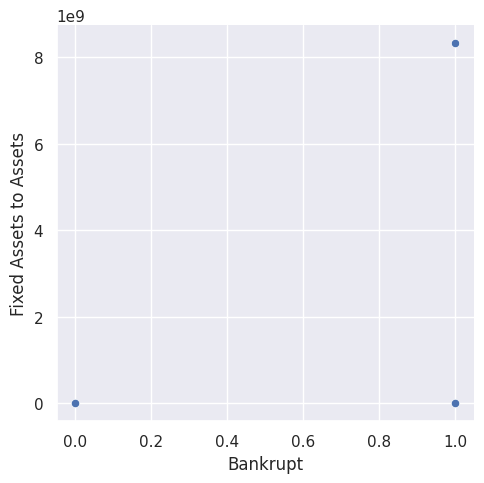

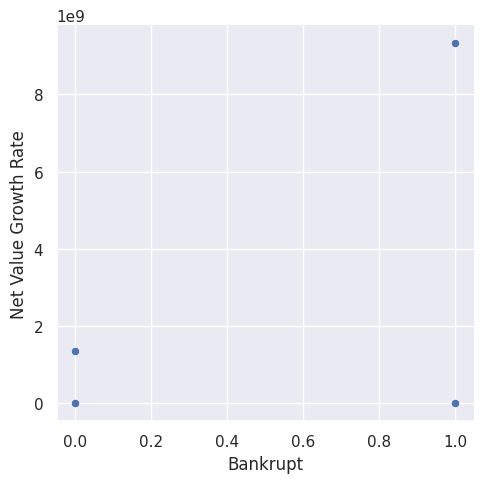

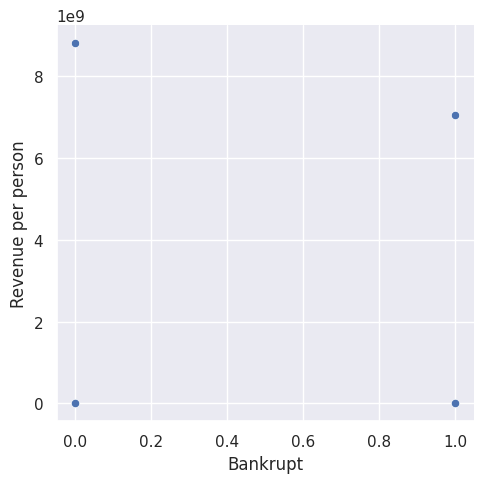

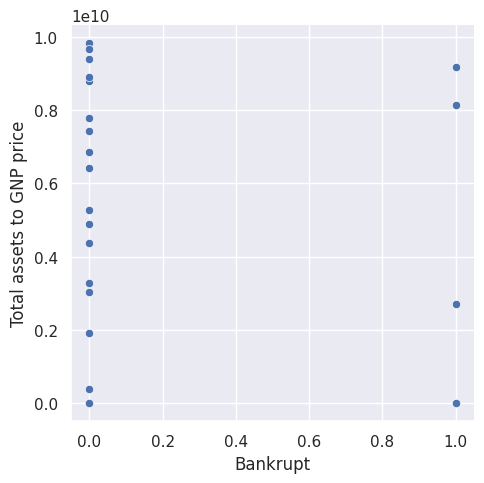

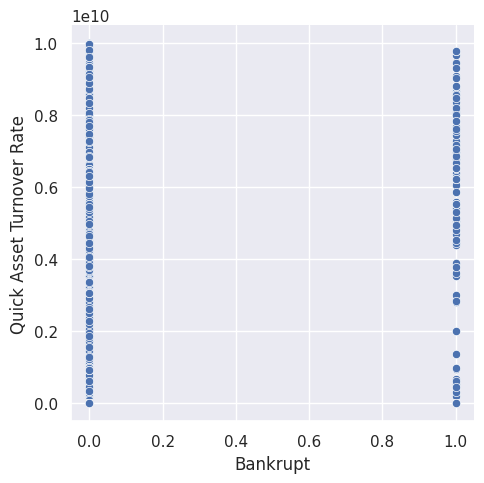

In [18]:
for name in corr_names:
  sns.relplot(data=df, x='Bankrupt', y=df[name])
  plt.show()

Some outliers seem to be assocated with bankruptcy, so keep all outliers for now.

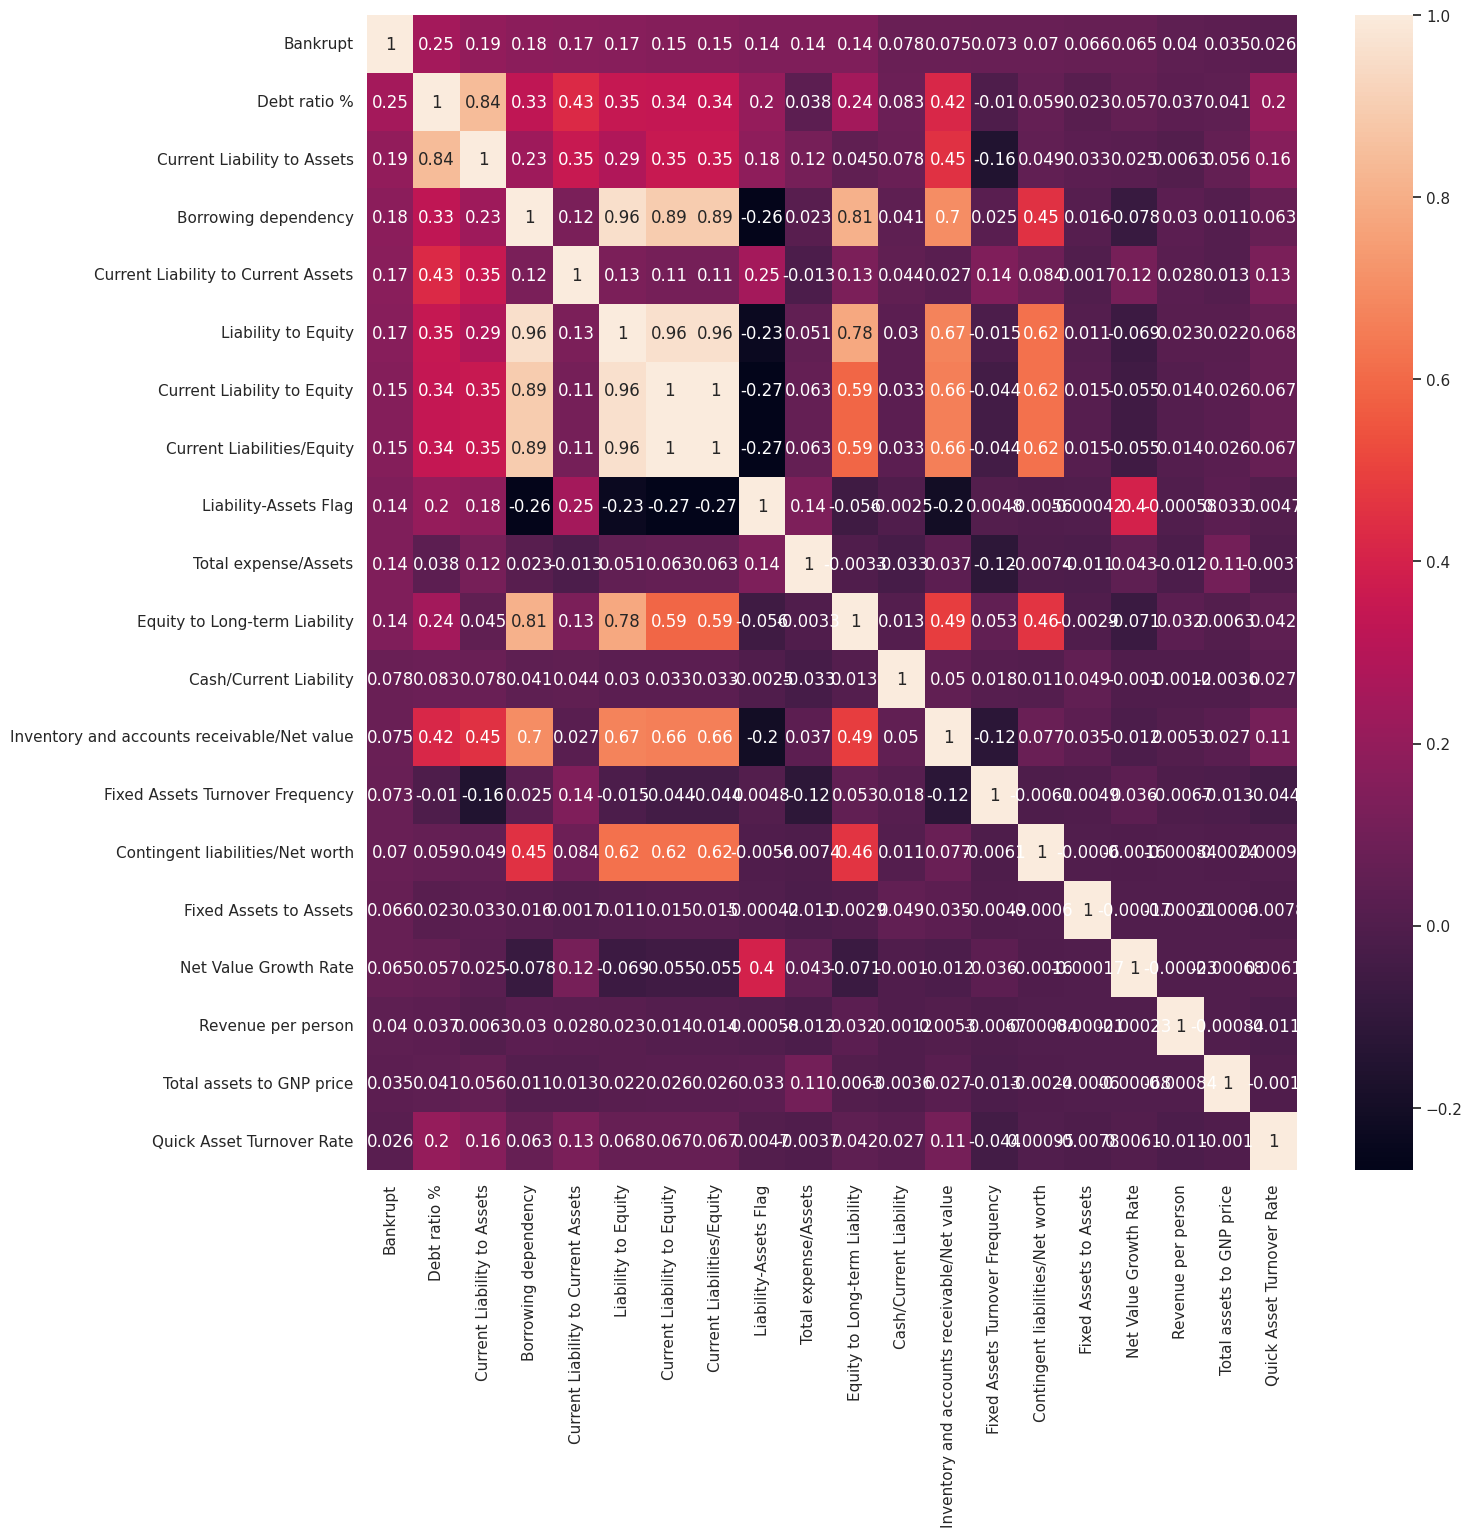

In [19]:
#Check for collinearity between high predictors:

#Get Top correlations with Brankruptcy
corrmat = df[corr_names].corr()

f, ax = plt.subplots(figsize = (15,15))

sns.heatmap(corrmat, annot=True)
plt.show();

**Data Preparation for Modeling**

In [20]:
# Apply standard scaling to numeric columns
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

df_scaled.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,5.476811
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,5.476811
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086567,...,-0.820510,-0.049491,-0.005984,-0.383699,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,5.476811
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011078,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,5.476811
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540707,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,5.476811


In [21]:
x = df_scaled.drop('Bankrupt', axis = 1)
y = df['Bankrupt']

In [22]:
sm = SMOTE(random_state=123)
x_sm , y_sm = sm.fit_resample(x,y)

print(f'''Shape of X before SMOTE:{x.shape}
Shape of X after SMOTE:{x_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(6819, 94)
Shape of X after SMOTE:(13198, 94) 


Target Class distributuion before SMOTE:
0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: Bankrupt, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_sm,
    y_sm,
    test_size = .2,
    random_state = 777)

In [24]:
# initialize our results dataframe

results = pd.DataFrame(columns = ['Model', 'specificity', 'FPR', 'precision', 'recall', 'f1-score', 'AUC-score'])

In [25]:
# Define a function that gets scores for a given model and appends to the results dataframe

def model_evaluate(results, model, x_test, y_test):
  y_pred_test = model.predict(x_test)
  tp, fn, fp, tn = confusion_matrix(y_test,y_pred_test,labels=[1,0]).reshape(-1)

  cm = confusion_matrix(y_test,y_pred_test)
  p = sns.heatmap(cm,annot=True,fmt="",cmap='Blues', cbar=False)
  p.set(xlabel = "Predicted", ylabel = "Actual")


  specificity = round(tn / (tn + fp),4)
  FPR = 1 - specificity
  precision = round(metrics.precision_score(y_test, y_pred_test),4)
  recall = round(metrics.recall_score(y_test, y_pred_test),4)
  f1_score = round(metrics.f1_score(y_test, y_pred_test),4)
  AUC_score = round(roc_auc_score(y_test, y_pred_test),4)

  row = [model, specificity, FPR, precision, recall, f1_score, AUC_score]
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)

  return results

# Modeling
## Logistic Regression


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

lr.fit(x_train, y_train)

lr.score(x_test, y_test)

y_pred_test = lr.predict(x_test)

LogisticRegression(max_iter=1000)

0.893560606060606

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


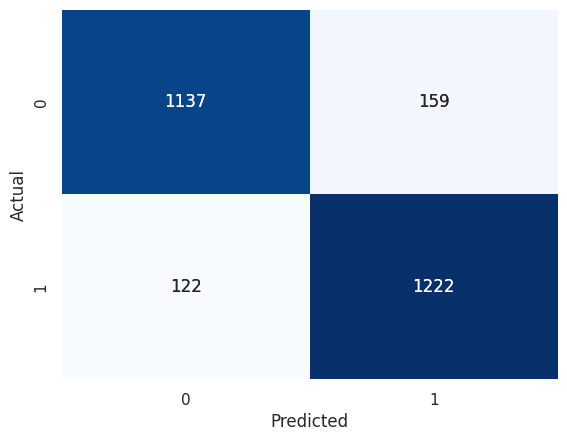

In [27]:
#call function
model_evaluate(results, lr, x_test, y_test)

#save row created in function to dataframe
results = model_evaluate(results, lr, x_test, y_test)

## Naïve Bayes Model

In [28]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
GausNB = GaussianNB()

# Train the model using the training sets
GausNB.fit(x_train,y_train)

GaussianNB()

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


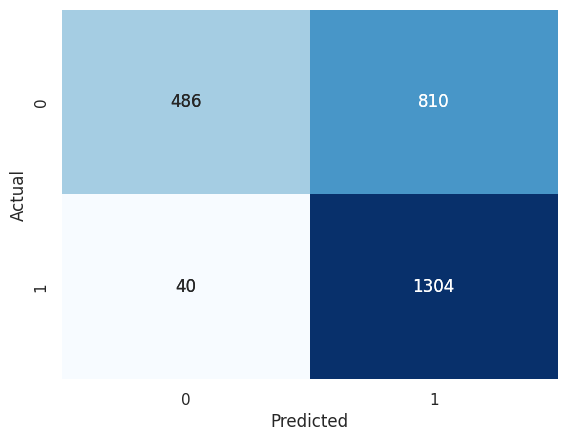

In [29]:
model_evaluate(results, GausNB, x_test, y_test)

results = model_evaluate(results, GausNB, x_test, y_test)

The logistic regression model performs significantly better than the naiive bayes model

SVM Model

In [30]:
### SVM Model
from sklearn.svm import SVC

SVC(probability=True)

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726
2,SVC(probability=True),0.8958,0.1042,0.9061,0.9688,0.9364,0.9323


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


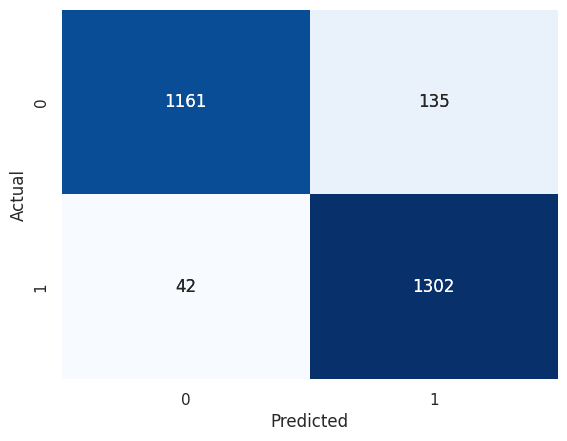

In [31]:
# Model Before Tuning

# train the model on train set
model = SVC(probability=True)
model.fit(x_train, y_train)
 
#Call Function
model_evaluate(results, model, x_test, y_test)

#append results to dataframe
results = model_evaluate(results, model, x_test, y_test)

In [32]:
# Tune SVM
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.593 total time=  11.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=  11.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.589 total time=  10.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=  11.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.586 total time=  11.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.966 total time=   5.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   5.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.962 total time=   4.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.968 total time=   3.9s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.973 total time=   4.7s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.575 total time=   7.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [34]:
results

,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726
2,SVC(probability=True),0.8958,0.1042,0.9061,0.9688,0.9364,0.9323


In [35]:
#Hard Coding Tuned Parameters so tuning does not have to be re run:

grid = SVC(C = 10, gamma=.1, kernel='rbf')

#fit

grid.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726
2,SVC(probability=True),0.8958,0.1042,0.9061,0.9688,0.9364,0.9323
3,"SVC(C=10, gamma=0.1)",0.9892,0.0108,0.9894,0.9769,0.9832,0.9831


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


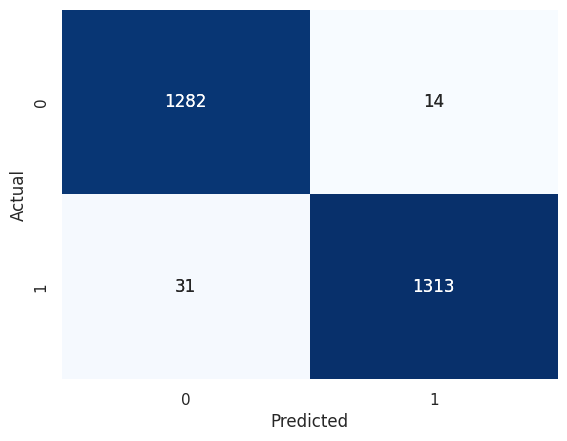

In [36]:
#Call Function
model_evaluate(results, grid, x_test, y_test)

results = model_evaluate(results, grid, x_test, y_test)

The Tuned SVC has the best performance so far

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state = 777)
# fit the model to the training set
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=777)

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726
2,SVC(probability=True),0.8958,0.1042,0.9061,0.9688,0.9364,0.9323
3,"SVC(C=10, gamma=0.1)",0.9892,0.0108,0.9894,0.9769,0.9832,0.9831
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9738,0.0262,0.9752,0.9955,0.9853,0.9847


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


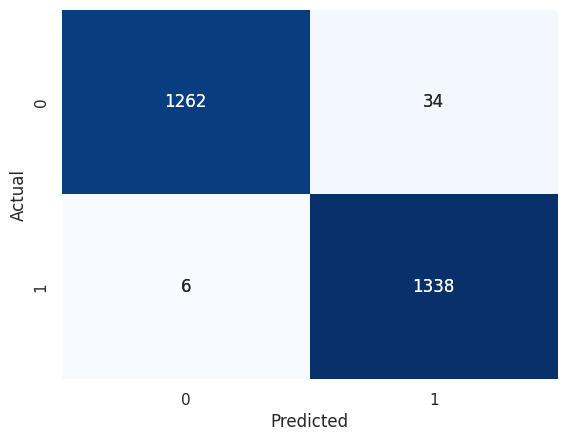

In [38]:
#Call Function
model_evaluate(results, clf, x_test, y_test)

results = model_evaluate(results, clf, x_test, y_test)

### Tune the Random Forest Model

In [39]:
# Hyper parameters to tune:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]


#Criteria for measuring quality of split
criteria = ['gini', 'entropy']


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criteria}

In [40]:
# Import halving grid search function to speed up tuning over grid search cv:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state = 777)


search = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

search.fit(x_train, y_train)

search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=777),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=42, verbose=2)

{'n_estimators': 138,
 'max_features': 'auto',
 'max_depth': 54,
 'criterion': 'gini'}

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726
2,SVC(probability=True),0.8958,0.1042,0.9061,0.9688,0.9364,0.9323
3,"SVC(C=10, gamma=0.1)",0.9892,0.0108,0.9894,0.9769,0.9832,0.9831
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9738,0.0262,0.9752,0.9955,0.9853,0.9847
5,"RandomizedSearchCV(cv=3, estimator=RandomFores...",0.9722,0.0278,0.9738,0.9955,0.9845,0.9839


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


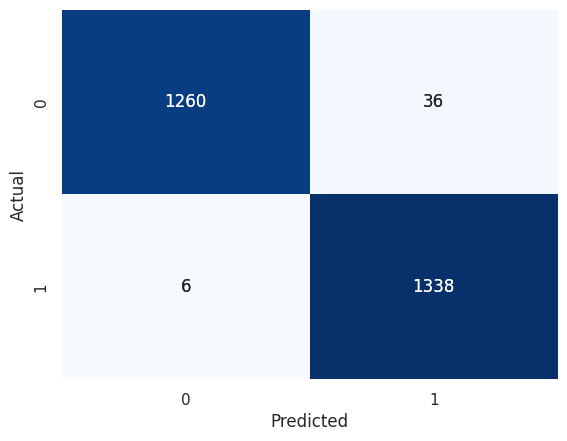

In [41]:
#Call Function
model_evaluate(results, search, x_test, y_test)

results = model_evaluate(results, search, x_test, y_test)

Our tuned random forest classifier performed slightly better than the initial model.

## Gradiant Boosted Trees

In [42]:
# initial model

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=777)
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=777)

<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


,Model,specificity,FPR,precision,recall,f1-score,AUC-score
0,LogisticRegression(max_iter=1000),0.8773,0.1227,0.8849,0.9092,0.8969,0.8933
1,GaussianNB(),0.3750,0.6250,0.6168,0.9702,0.7542,0.6726
2,SVC(probability=True),0.8958,0.1042,0.9061,0.9688,0.9364,0.9323
3,"SVC(C=10, gamma=0.1)",0.9892,0.0108,0.9894,0.9769,0.9832,0.9831
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9738,0.0262,0.9752,0.9955,0.9853,0.9847
5,"RandomizedSearchCV(cv=3, estimator=RandomFores...",0.9722,0.0278,0.9738,0.9955,0.9845,0.9839
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.9336,0.0664,0.9390,0.9851,0.9615,0.9594


<ipython-input-25-d102a501ce5a>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)


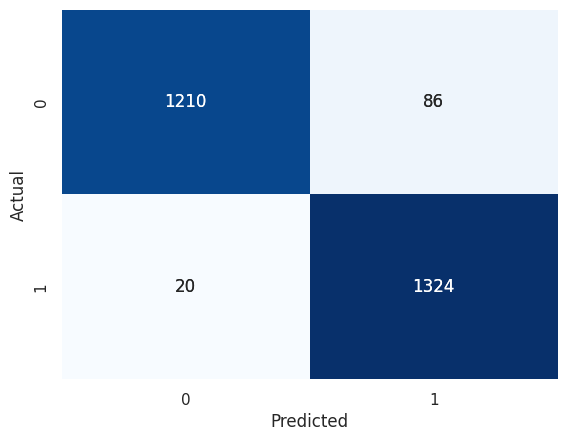

In [43]:
#Call Function
model_evaluate(results, gb, x_test, y_test)

results = model_evaluate(results, gb, x_test, y_test)

In [44]:
# Hyper parameters to tune:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 10)]


#Criteria for measuring quality of split
criteria = ['friedman_mse', 'squared_error', 'mae']

#learning rate
learning_rate = [0.15,0.1,0.05,0.01,0.005,0.001]


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criteria,
               'learning_rate': learning_rate}

In [45]:
# Tune n_estimators and learning rate first:
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

In [ ]:
#tune gradiant boosting model

gb = GradientBoostingClassifier(random_state=777)

search = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

search.fit(x_train, y_train)

search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
param_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criteria,}

In [ ]:
# Tune remaining parameters

search = RandomizedSearchCV(estimator = GradientBoostingClassifier(learning_rate=.15, n_estimators=577), param_distributions = param_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

search.fit(x_train, y_train)

search.best_params_

In [ ]:
# hard code optimal parameters and fit
gb = GradientBoostingClassifier(random_state=777, learning_rate=.15, n_estimators=577, criterion='friedman_mse', max_depth=67, max_features='sqrt')
gb.fit(x_train, y_train)

In [ ]:
#Call Function
model_evaluate(results, gb, x_test, y_test)

results = model_evaluate(results, gb, x_test, y_test)

The tuned gradiant boosting classifer has the best f1-score so far.

## Extra Trees Model

In [ ]:
#Extra Trees Base Model:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees = ExtraTreesClassifier(random_state=777)
extra_trees.fit(x_train, y_train)

In [ ]:
#Call Function
model_evaluate(results, extra_trees, x_test, y_test)

results = model_evaluate(results, extra_trees, x_test, y_test)

The default extra trees model has the best out of box performance.

In [ ]:
# Tune Extra Trees Model:

# Hyper parameters to tune:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 80, num = 10)]

#Criteria for measuring quality of split
criteria = ['gini', 'entropy']


# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criteria,}

In [ ]:
# Tune parameters

search = RandomizedSearchCV(estimator = extra_trees, param_distributions = param_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

search.fit(x_train, y_train)

search.best_params_

In [ ]:
# hard code optimal parameters and fit
extra_trees = ExtraTreesClassifier(random_state=777, n_estimators=683, criterion='gini', max_depth=54, max_features='auto')
extra_trees.fit(x_train, y_train)

In [ ]:
#Call Function
model_evaluate(results, extra_trees, x_test, y_test)

results = model_evaluate(results, extra_trees, x_test, y_test)

The tuned extra trees model only performed better than the default model on recall, arguably the most important metric for bankruptcy prediction.

## Summary
Overall, the tuned gradiant boosted classification model had the highest f1 score of 0.9878.

In [ ]:
summary = results



models = ['Logistic_Regression', 'Naive_Bayes', 'Support_Vector', 'Tuned_Support_Vector',
          'Random_Forest', 'Tuned_Random_Forest', 'Gradiant_Boost', 'Tuned_Gradiant_Boost',
          'Extra_Trees', 'Tuned_Extra_Trees']

summary['Model'] = models

summary

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x='Model', y = 'f1-score', data = summary)
ax.set_ylim(.7, 1)
plt.xticks(rotation='vertical');

In [ ]:
# Let's look at the top predictors used in the gradiant boosting model:

#y_pred_test = gb.predict(x_test)

#gb.feature_importances_

columns = list(x_train.columns)

feature_df = pd.DataFrame(gb.feature_importances_, columns)

feature_df.head(20).sort_values(by=[0], ascending = False)